In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import *
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [10]:
# Import data
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [11]:
# Divide data into features and label
x_data_set = np.array(dataset.drop(columns=["Salary", "Position"], axis=0))
y_data_set = np.array(pd.DataFrame(dataset.Salary))

In [12]:
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(x_data_set, y_data_set, test_size = 0.2, random_state = 0)


In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_data_set = sc_x.fit_transform(x_data_set)
y_data_set = sc_y.fit_transform(y_data_set)

In [14]:
# Change the kernel
from sklearn.svm import SVR
regressor = SVR(kernel = "rbf")  # rbf makes our ML mpdel non linear
regressor.fit(x_data_set, y_data_set)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [15]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(np.array([[(6.5)]]))))
y_pred

array([170370.0204065])

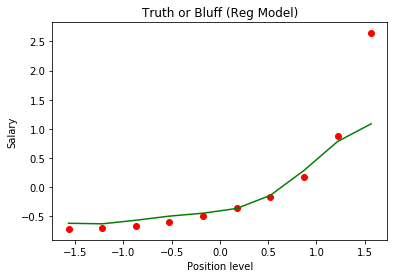

In [16]:
# Visualizing the SVR regression results
plt.scatter(x_data_set, y_data_set, color ='red')
plt.plot(x_data_set, regressor.predict(x_data_set), color ='green')
plt.title('Truth or Bluff (Reg Model)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()